<a href="https://colab.research.google.com/github/BalkisG77/pythoncode-tutorials/blob/master/TP_California-Housing_Balkis_GOUIAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importer les librairies 
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Lire le dataset housing
housing  = pd.read_csv('/content/housing.csv')

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#Description statistique 
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#Concatenate et drop 'Ocean_proximity' , Island
housing = pd.concat([housing.drop('ocean_proximity', axis=1), pd.get_dummies(housing.ocean_proximity)], axis=1) 
housing = housing.drop('ISLAND', axis=1)

In [ ]:
 to_predict = housing[housing.total_bedrooms.isnull()].drop(['total_bedrooms'], axis=1)
 to_predict

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,0,0,1,0
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,0,0,1,0
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,0,0,1,0
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,0,0,1,0
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,3171.0,779.0,3.3409,220500.0,0,0,0,1
20268,-119.18,34.19,19.0,2393.0,1938.0,762.0,1.6953,167400.0,0,0,0,1
20372,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,410700.0,1,0,0,0
20460,-118.75,34.29,17.0,5512.0,2734.0,814.0,6.6073,258100.0,1,0,0,0


In [ ]:
X = housing.drop(columns = ['housing_median_age' ]) 
y = housing['housing_median_age']

In [ ]:
train = housing.dropna() 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = train.drop('housing_median_age', axis=1) 
X = scaler.fit_transform(X) 
y = train.housing_median_age 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf = RandomForestClassifier(n_jobs=-1, random_state=0)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([37.,  4., 32., ..., 52., 27.,  9.])

In [ ]:
err_default = 1 - rf.score(X_test, y_test)
err_default

0.8935649620748716

In [ ]:
from sklearn import metrics
err = 1.0 - metrics.accuracy_score(y_test, y_pred)
err

0.8935649620748716

**Tuning max_depth**

In [ ]:
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths.append(None)
import matplotlib.pyplot as plt


In [ ]:
errors = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=0)
    rf.fit(X_train, y_train)
    err = round((1.0 - rf.score(X_test, y_test)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : max_depth = {rf.max_depth} => err_test = {err}\n")
    print(f'Improvement of {err_default - err}%\n\n')



Results : max_depth = 1 => err_test = 93.076

Improvement of -92.18243503792512%




Results : max_depth = 2 => err_test = 91.583

Improvement of -90.68943503792512%




Results : max_depth = 3 => err_test = 91.289

Improvement of -90.39543503792513%




Results : max_depth = 4 => err_test = 90.286

Improvement of -89.39243503792513%




Results : max_depth = 5 => err_test = 89.748

Improvement of -88.85443503792513%




Results : max_depth = 6 => err_test = 89.332

Improvement of -88.43843503792512%




Results : max_depth = 7 => err_test = 89.356

Improvement of -88.46243503792512%




Results : max_depth = 8 => err_test = 88.451

Improvement of -87.55743503792512%




Results : max_depth = 9 => err_test = 88.647

Improvement of -87.75343503792513%




Results : max_depth = 10 => err_test = 88.598

Improvement of -87.70443503792512%




Results : max_depth = None => err_test = 89.356

Improvement of -88.46243503792512%




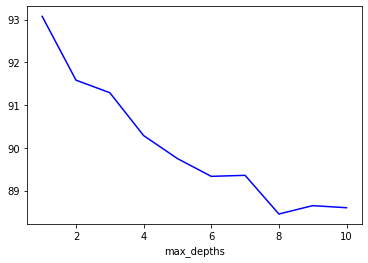

In [ ]:
plt.plot(max_depths, errors, 'b')
plt.xlabel('max_depths')
plt.show()

**Tuning n_estimators **



In [ ]:
import numpy as np
n_estimators = np.linspace(start = 1, stop = 1000, num = 250, dtype = int)
print(n_estimators)


[   1    5    9   13   17   21   25   29   33   37   41   45   49   53
   57   61   65   69   73   77   81   85   89   93   97  101  105  109
  113  117  121  125  129  133  137  141  145  149  153  157  161  165
  169  173  177  181  185  189  193  197  201  205  209  213  217  221
  225  229  233  237  241  245  249  253  257  261  265  269  273  277
  281  285  289  293  297  301  305  309  313  317  321  325  329  334
  338  342  346  350  354  358  362  366  370  374  378  382  386  390
  394  398  402  406  410  414  418  422  426  430  434  438  442  446
  450  454  458  462  466  470  474  478  482  486  490  494  498  502
  506  510  514  518  522  526  530  534  538  542  546  550  554  558
  562  566  570  574  578  582  586  590  594  598  602  606  610  614
  618  622  626  630  634  638  642  646  650  654  658  662  667  671
  675  679  683  687  691  695  699  703  707  711  715  719  723  727
  731  735  739  743  747  751  755  759  763  767  771  775  779  783
  787 

In [ ]:
errors = []
for estimator in n_estimators :
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=0)
   rf.fit(X_train, y_train)
   err = round((1.0 - rf.score(X_test, y_test)) * 50, 3)
   errors.append(err)
   print(f"\n\nResults : n_estimators = {rf.n_estimators} => err_test = {err}\n\n")
   print('Improvement of {:0.2f}%.'.format( 50 * (err_default - err)))

print(errors)



Results : n_estimators = 1 => err_test = 46.856


Improvement of -2298.12%.


Results : n_estimators = 5 => err_test = 46.562


Improvement of -2283.42%.


Results : n_estimators = 9 => err_test = 45.755


Improvement of -2243.07%.


Results : n_estimators = 13 => err_test = 45.522


Improvement of -2231.42%.


Results : n_estimators = 17 => err_test = 45.4


Improvement of -2225.32%.


Results : n_estimators = 21 => err_test = 45.131


Improvement of -2211.87%.


Results : n_estimators = 25 => err_test = 44.947


Improvement of -2202.67%.


Results : n_estimators = 29 => err_test = 44.935


Improvement of -2202.07%.


Results : n_estimators = 33 => err_test = 45.021


Improvement of -2206.37%.


Results : n_estimators = 37 => err_test = 44.923


Improvement of -2201.47%.


Results : n_estimators = 41 => err_test = 44.862


Improvement of -2198.42%.


Results : n_estimators = 45 => err_test = 44.874


Improvement of -2199.02%.


Results : n_estimators = 49 => err_test = 44.862


Impr